<a href="https://colab.research.google.com/github/FabioRovai/DEEPWALL-E/blob/main/Deep_Dazemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*When ready press change runtime type/ GPU and then runtime/run all*

In [1]:
#@title Deep Daze model download
!pip install imgaug==0.2.5 -qq
!pip install deep-daze --upgrade -qq
!nvidia-smi -L

     |████████████████████████████████| 563kB 29.0MB/s 
     |████████████████████████████████| 1.4MB 28.7MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 3.3MB 47.9MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
GPU 0: Tesla T4 (UUID: GPU-d527f501-b046-7b60-d7e4-ade0cd3c95ab)


image updated at "./a_tree_in_the_ocean.000002.jpg"


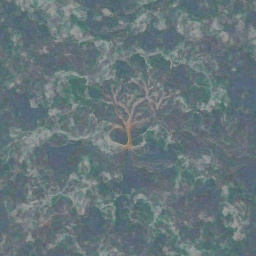

image updated at "./a_tree_in_the_ocean.000003.jpg"


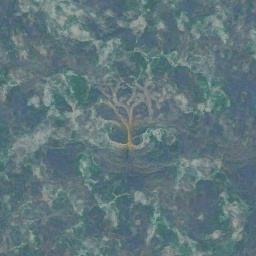

KeyboardInterrupt: ignored

In [2]:
#@title Insert here your short story

# Original values: num_layers: 32 image_width: 512 learning_rate: 10e-5 iterations: 1050 (as a rule of thumb, if you change anything here, multiply/divide them by 2, or 4 or 6 etc.)
from tqdm.notebook import trange
from IPython.display import Image, display

from deep_daze import Imagine
%mkdir '/content/miao'
%cd '/content/miao'
TEXT = 'a tree in the ocean' #@param {type:"string"}
NUM_LAYERS = 32 
SAVE_EVERY =  100
IMAGE_WIDTH = 256 
SAVE_PROGRESS = True 
LEARNING_RATE = 1e-5 
ITERATIONS = 1050 

model = Imagine(
    text = TEXT,
    num_layers = NUM_LAYERS,
    save_every = SAVE_EVERY,
    image_width = IMAGE_WIDTH,
    lr = LEARNING_RATE,
    iterations = ITERATIONS,
    save_progress = SAVE_PROGRESS
)

for epoch in trange(20, desc = 'epochs'):
    for i in trange(ITERATIONS, desc = 'iteration'):
        model.train_step(epoch, i)

        if i % model.save_every != 0:
            continue

        filename = TEXT.replace(' ', '_')
        image = Image(f'./{filename}.jpg')
        display(image)